In [1]:
###: Loading H2O Library

In [2]:
import h2o

In [3]:
###: Get H2O Version

In [4]:
h2o.__version__

u'3.14.0.7'

In [5]:
###: Initalizing H2O cluster

In [6]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,22 hours 27 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,1 month and 3 days
H2O cluster name:,H2O_started_from_R_avkashchauhan_ppg732
H2O cluster total nodes:,1
H2O cluster free memory:,2.006 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
###: Importing both training and test dataset into H2O cluster memory

In [8]:
df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/titanic_list.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
### Understanding the dataset

In [10]:
df.describe()

Rows:1309
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,int,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,0.0,NaN,,0.1667,0.0,0.0,680.0,0.0,,,1.0,1.0,
mean,2.294881589,0.381970970206,NaN,,29.8811345124,0.498854087089,0.385026737968,249039.136886,33.2954792813,,,9.40452261307,160.809917355,
maxs,3.0,1.0,NaN,,80.0,8.0,9.0,3101298.0,512.3292,,,16.0,328.0,
sigma,0.83783601897,0.486055170866,NaN,,14.4134996999,1.0416583906,0.86556027535,442685.317677,51.7586682392,,,4.3574169836,97.696921996,
zeros,0,809,0,,0,891,1002,0,17,,,0,0,
missing,0,0,0,0,263,0,0,352,1,1014,2,911,1188,564
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160.0,211.3375,B5,S,2.0,nan,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.55,C22 C26,S,11.0,nan,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"


In [11]:
###: Listing all columns

In [12]:
df.col_names

[u'pclass',
 u'survived',
 u'name',
 u'sex',
 u'age',
 u'sibsp',
 u'parch',
 u'ticket',
 u'fare',
 u'cabin',
 u'embarked',
 u'boat',
 u'body',
 u'home.dest']

In [13]:
###: Setting response variable

In [14]:
response = "survived"

In [15]:
###: Setting response variable to enum or categorical so we can build a classification model

In [16]:
df[response] = df[response].asfactor()

In [17]:
###: Spliting the dataset into train and test 

In [18]:
train_df, test_df = df.split_frame(ratios=[0.9])

In [19]:
print(train_df.shape)
print(test_df.shape)

(1181, 14)
(128, 14)


In [20]:
###: Understanding Training dataset

In [21]:
train_df.describe()

Rows:1181
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,enum,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,,NaN,,0.3333,0.0,0.0,680.0,0.0,,,1.0,4.0,
mean,2.29551227773,,NaN,,30.1659604873,0.490262489416,0.386113463167,248154.574566,33.3127326271,,,9.38309859155,163.785714286,
maxs,3.0,,NaN,,80.0,8.0,9.0,3101298.0,512.3292,,,16.0,328.0,
sigma,0.839625731326,,NaN,,14.5346236598,1.04684271827,0.881991323988,430740.319342,52.1864077096,,,4.38535653665,98.3587319684,
zeros,0,,0,,0,813,907,0,14,,,0,0,
missing,0,0,0,0,237,0,0,316,1,911,2,826,1069,512
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160.0,211.3375,B5,S,2.0,nan,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.55,C22 C26,S,11.0,nan,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"


In [22]:
###: Understanding Test dataset

In [23]:
test_df.describe()

Rows:128
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,enum,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,,NaN,,0.1667,0.0,0.0,2650.0,0.0,,,1.0,1.0,
mean,2.2890625,,NaN,,27.2450980392,0.578125,0.375,257355.945652,33.136425,,,9.58139534884,123.777777778,
maxs,3.0,,NaN,,63.0,5.0,3.0,3101295.0,263.0,,,16.0,245.0,
sigma,0.824357003066,,NaN,,13.0112650076,0.992962441107,0.69870521422,545071.795757,47.8254085738,,,4.16466175463,85.268367197,
zeros,0,,0,,0,78,95,0,3,,,0,0,
missing,0,0,0,0,26,0,0,36,0,103,0,85,119,52
0,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,135.0,"Montreal, PQ / Chesterville, ON"
1,1.0,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1.0,0.0,13502.0,77.9583,D7,S,10.0,nan,"Hudson, NY"
2,1.0,1,"Bird, Miss. Ellen",female,29.0,0.0,0.0,nan,221.7792,C97,S,8.0,nan,


In [24]:
###: Training and test dataset - columns and rows details

In [25]:
print(train_df.shape)
print(test_df.shape)

(1181, 14)
(128, 14)


In [26]:
###: Training and Test Dataframes - columns names

In [27]:
print(train_df.col_names)
print(test_df.col_names)

[u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']
[u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']


In [28]:
###: Settings all features for supervised machine learning

In [29]:
features = train_df.col_names
print(features)

[u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']


In [30]:
###: Creating a list of all features we will use for machine learning

In [31]:
features.remove(response)
print(features)

[u'pclass', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']


In [32]:
###: Ignoring other features which are not needed for training

In [33]:
for feature_name in ['name', 'ticket', 'home.dest']:
    features.remove(feature_name)
print(features)    

[u'pclass', u'sex', u'age', u'sibsp', u'parch', u'fare', u'cabin', u'embarked', u'boat', u'body']


In [34]:
###: Understanding response variable values as historgram in Training data

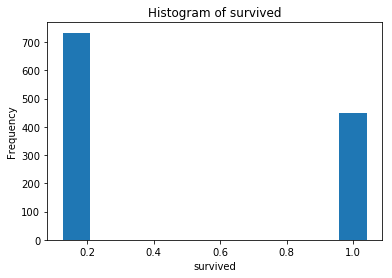

In [35]:
train_df[response].asnumeric().hist()

In [36]:
###: Importing H2O H2OGradientBoostingEstimator to build GBM Model

In [37]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [38]:
###:Building Gradient Boosting (GBM) -  Classification model with cross validation

In [39]:
gbm_model_with_cv = H2OGradientBoostingEstimator(nfolds=5)

In [40]:
###: Training the model

In [41]:
gbm_model_with_cv.train(x = features, y = response, training_frame=train_df)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [42]:
###: Getting model performance

In [43]:
gbm_model_with_cv.model_performance(valid=True,test_data=test_df).auc()

0.9679908906882592

In [44]:
###:Building GBM classification model with cross validation and key GBM parameters configuration

In [45]:
gbm_model_cv_config = H2OGradientBoostingEstimator(nfolds=5,
                                                    keep_cross_validation_predictions=True,
                                                    fold_assignment="auto",
                                                    seed=12345)

In [46]:
###: Training GBM Model

In [47]:
gbm_model_cv_config.train(x = features, y = response, 
                                            training_frame=train_df, 
                                           model_id = "gbm_model_with_training_and_validtion_python")

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [48]:
###: Getting GBM model performance on test data

In [49]:
gbm_model_cv_config.model_performance(valid=True,test_data=test_df).auc()

0.9679908906882592

In [50]:
###: Importing H2O Grid Library

In [51]:
from h2o.grid import H2OGridSearch

In [52]:
###: Settings GBM grid parameters

In [53]:
gbm_hyper_params = {"learn_rate": [0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
                "max_depth": [ 5, 7, 10],
                "sample_rate": [0.5, 0.75, 1.0],
                "col_sample_rate": [0.5, 0.6, 0.7, 0.8]}

In [54]:
###: Setting H2O Grid Search Criteria

In [55]:
grid_search_criteria = { 'strategy': "RandomDiscrete", 
                    'seed': 123,
                    'stopping_metric': "AUTO", 
                    'stopping_tolerance': 0.01,
                    'stopping_rounds': 5 }

In [56]:
###: Finalzing the H2O Grid searching settings

In [60]:
gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator(
                                                    nfolds=5,
                                                    keep_cross_validation_predictions=True,
                                                    fold_assignment="auto",
                                                    seed=12345),
                     hyper_params=gbm_hyper_params,
                     search_criteria=grid_search_criteria,
                     grid_id="titnaic_gbm_grid_python")

In [61]:
###: Finally training H2O Grid with data 

In [62]:
gbm_grid.train(x=features, y=response, training_frame=train_df)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [ ]:
###: Finally getting total count of GBM models

In [ ]:
len(gbm_grid)

In [ ]:
###: Defining a function to find the best model from the grid based on r2 or auc

In [ ]:
def find_best_model_from_grid(h2o_grid, test_parameter):    
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)            
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)            
    #print(model_list)        
    max_index = model_list.index(max(model_list))
    #print(max_index)
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " +  best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " +  str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " +  str(best_model.auc()))
    return best_model

In [ ]:
###: Applying the function to get the best model from the grid

In [ ]:
best_model = find_best_model_from_grid(gbm_grid, "auc")

In [ ]:
###: Getting the best model performance on test data

In [ ]:
best_model.model_performance(valid=True,test_data=test_df).auc()

In [ ]:
###: Performing predictions with one of the above model

In [ ]:
gbm_predictions = best_model.predict(test_df)

In [ ]:
gbm_predictions

In [ ]:
###: Understanding/Validating predictions based on prediction results historgram

In [ ]:
gbm_predictions['predict'].asnumeric().hist()

In [ ]:
###: Getting Scorring History

In [ ]:
best_model.scoring_history()

In [ ]:
###: Getting GBM model variable importance 

In [ ]:
best_model.varimp()

In [ ]:
###: Getting model variable importance PLOT

In [ ]:
best_model.varimp_plot()